In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prishasawhney/mushroom-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prishasawhney/mushroom-dataset/versions/1


In [2]:
import pandas as pd
df = pd.read_csv(path +'/mushroom_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


## PreProcessing

In [3]:
df.shape

(54035, 9)

In [4]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [5]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Visualization

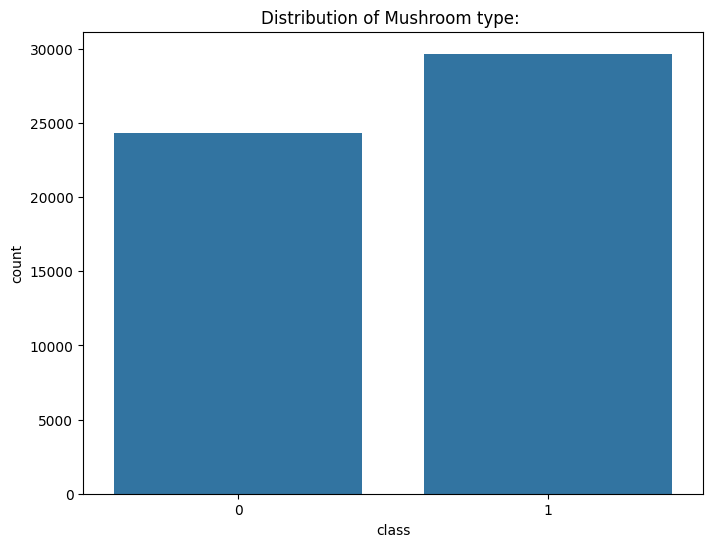

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom type: ') # مشروم سام ولا قابل للاكل
plt.show()

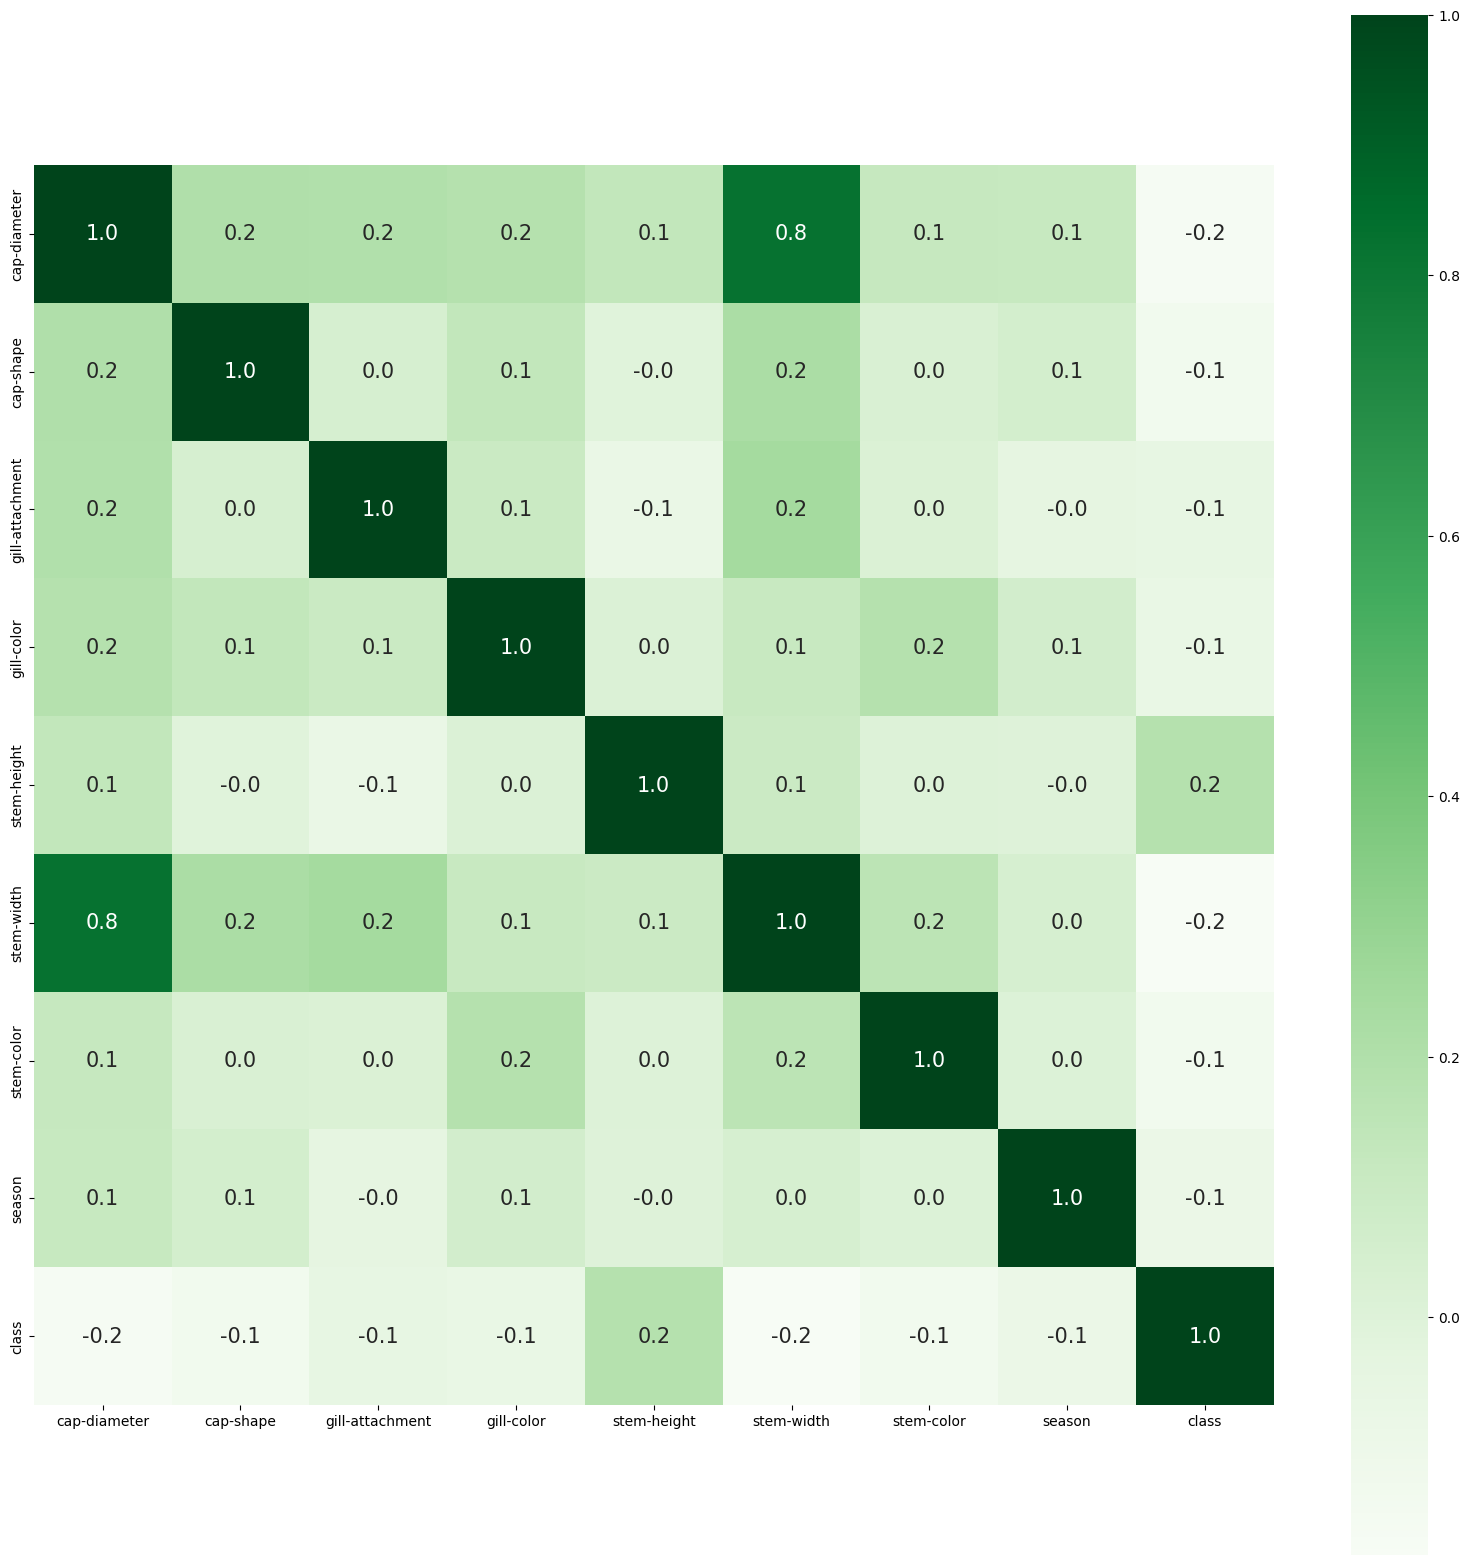

In [8]:
corr = df.corr()
corr.shape
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

## Logistic Regression

In [10]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
print("Logistic accuracy: " ,accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic accuracy:  0.6365318774868141
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



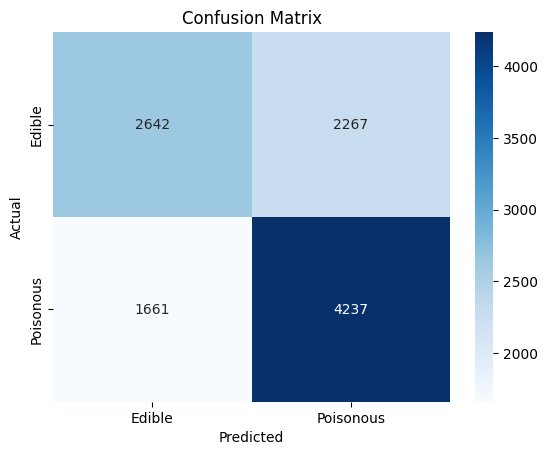

Accuracy from Confusion Matrix: 0.63653


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


true_positive = conf_matrix[1, 1]  # Bottom-right
true_negative = conf_matrix[0, 0]  # Top-left
total = conf_matrix.sum()

accuracy_from_cm = (true_positive + true_negative) / total
print(f"Accuracy from Confusion Matrix: {accuracy_from_cm:.5f}")

## Support Vector Machine

In [12]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy:.5f}")


SVM Accuracy: 0.90812


## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_accuracy = dt_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {dt_accuracy:.5f}")

Decision Tree Accuracy: 0.97862


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.5f}")

Random Forest Accuracy: 0.99084


## K - Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# euclidean distance
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_accuracy = knn_model.score(X_test, y_test)
print(f"KNN Accuracy: {knn_accuracy:.5f}")

KNN Accuracy: 0.98964


## Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

gnb_accuracy = gnb_model.score(X_test, y_test)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy:.5f}")

Gaussian Naive Bayes Accuracy: 0.63311


## Evaluation and comparision of all the models

In [17]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines',
              'K - Nearest Neighbors'],
    'Score': [accuracy_from_cm, gnb_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.990839
5,K - Nearest Neighbors,0.989636
2,Decision Tree,0.978625
4,Support Vector Machines,0.908115
0,Logistic Regression,0.636532
1,Naive Bayes,0.633108


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
rf_accuracy = best_rf_model.score(X_test, y_test)
print(f"Best Random Forest Accuracy (after tuning): {rf_accuracy:.5f}")
print(f"Best hyperparameters: {grid_search_rf.best_params_}")


param_grid_svc = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}
svc_model = SVC(random_state=42)
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_svc_model = grid_search_svc.best_estimator_
svc_accuracy = best_svc_model.score(X_test,y_test)
print(f"Best SVC Accuracy (after tuning): {svc_accuracy:.5f}")
print(f"Best hyperparameters: {grid_search_svc.best_params_}")

Best Random Forest Accuracy (after tuning): 0.99149
Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
lr_accuracy = best_lr_model.score(X_test, y_test)
print(f"Best Logistic Regression Accuracy (after tuning): {lr_accuracy:.5f}")
print(f"Best hyperparameters: {grid_search_lr.best_params_}")


param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_model = GaussianNB()
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

best_nb_model = grid_search_nb.best_estimator_
nb_accuracy = best_nb_model.score(X_test, y_test)
print(f"Best Naive Bayes Accuracy (after tuning): {nb_accuracy:.5f}")

print(f"Best hyperparameters: {grid_search_nb.best_params_}")

Best Logistic Regression Accuracy (after tuning): 0.63949
Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Naive Bayes Accuracy (after tuning): 0.63533
Best hyperparameters: {'var_smoothing': 0.12328467394420659}
